In [0]:
import numpy as np
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

In [0]:
class GPNet(nn.Module):
  def __init__(self):
    super(GPNet, self).__init__()
    self.fc1 = nn.Linear(6, 10)
    self.fc2 = nn.Linear(10, 6)
    self.fc3 = nn.Linear(6, 4)
    self.JHist = []
  
  def forward(self, x):
    x = torch.tanh(self.fc1(x))
    x = torch.tanh(self.fc2(x))
    x = self.fc3(x)
    return x

  def fit(self, train_x, train_y, epochs=25, lr=0.01, showLoss=False):
    optimizer = optim.SGD(self.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for e in range(epochs):
        
      optimizer.zero_grad()

      y_pred = net(train_x) # define input

      loss = criterion(y_pred, train_y)
      loss.backward()
      optimizer.step()

      epoch_loss = loss.item()

      if e % 10 == 9 and showLoss:
        print(e + 1, epoch_loss)

      self.JHist.append(epoch_loss)



In [0]:
net = GPNet().double()
print(net)

GPNet(
  (fc1): Linear(in_features=6, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=6, bias=True)
  (fc3): Linear(in_features=6, out_features=4, bias=True)
)


In [0]:
savedData = torch.from_numpy(np.loadtxt('data.csv', delimiter=','))

In [0]:
input, output = savedData[:,:6], savedData[:,6:]
train_x, test_x = input[:4000,:], input[4000:,:]
train_y, test_y = output[:4000,:], output[4000:,:]

In [0]:
net.fit(train_x, train_y, epochs=3000, lr=0.0005, showLoss=False)

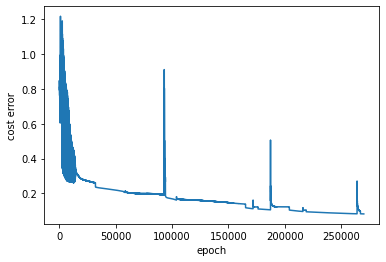

In [0]:
import matplotlib.pyplot as plt
plt.plot(net.JHist)
plt.ylabel("cost error")
plt.xlabel("epoch")
plt.show()

In [0]:
net.fit(train_x, train_y, epochs=10, lr=0.00075, showLoss=True)

10 0.08222101628859853


In [0]:
PATH = './GPNet2.pth'
torch.save(net.state_dict(), PATH)